# Covid-19 Data Analysis
<br>

### Objective 
<b>Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. <br>
<b>Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days.
<br><hr>

### Import Required packages and modules

In [546]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
std=StandardScaler()

In [547]:
covid = pd.read_csv('covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000


In [548]:
print('Shape of datset is -> ' , covid.shape)
print('-'*80)
print('Null values in the dataset -> ' , covid.isnull().sum())
print('-'*80)
print('Data type of each column -> ' , covid.dtypes)

Shape of datset is ->  (23481, 8)
--------------------------------------------------------------------------------
Null values in the dataset ->  SNo                    0
ObservationDate        0
Province/State     12195
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
--------------------------------------------------------------------------------
Data type of each column ->  SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [549]:
# Dropping SNo column from 'covid' dataset as it is not useful 
covid.drop(['SNo'],axis=1 ,inplace=True )

In [550]:
# 'Observation Date' is of object type -> convert into DateTime format
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

<br>

### Date-wise Analysis

In [551]:
# Grouping 'covid' data on the basis of 'ObservationDate'
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [552]:
datewise.tail()

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-05-06,3755341.000000,1245413.000000,263831.000000,105 days
2020-05-07,3845718.000000,1284741.000000,269567.000000,106 days
2020-05-08,3938064.000000,1322050.000000,274898.000000,107 days
2020-05-09,4024009.000000,1375624.000000,279311.000000,108 days
2020-05-10,4101699.000000,1408980.000000,282709.000000,109 days


### Basic insights from Covid Dataset Around the world
<br>

In [553]:
print('-------------Basic Information ---------------------')
print('\n')
print('Total Number of Countries Affected by Corono Virus -> ', len(covid['Country/Region'].unique()))

print('Total Number of Confirmed cases as of now {}  -> '.format(datewise.index.max()), datewise.Confirmed.max())
print('Total Number of Recovered  cases as of now {}  -> '.format(datewise.index.max()), datewise.Recovered.max())
print('Total Number of Deaths as of now {} -> '.format(datewise.index.max()), datewise.Deaths.max())

print('Total Number of Active  cases as of now {}  -> '.format(datewise.index.max()), datewise.Confirmed.max()-datewise.Recovered.max()-datewise.Deaths.max())
print('Total Number of Closed  cases as of now {}  -> '.format(datewise.index.max()), datewise.Recovered.max() + datewise.Deaths.max())

print("Approximate number of Confirmed Cases per Day ->  ",np.round(datewise["Confirmed"].max()/datewise.shape[0]))
print("Approximate number of Recovered  Cases per Day  -> ",np.round(datewise["Recovered"].max()/datewise.shape[0]))
print("Approximate number of Deaths per Day -> ",np.round(datewise["Deaths"].max()/datewise.shape[0]))

print("Approximate number of Confirmed Cases per hour  -> ",np.round(datewise["Confirmed"].max()/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour  -> ",np.round(datewise["Recovered"].max()/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour  -> ",np.round(datewise["Deaths"].max()/((datewise.shape[0])*24)))

print('Number of Confirmed Cases in Last 24 hrs -> ' , datewise.Confirmed[-1]-datewise.Confirmed[-2])
print('Number of Recovered  Cases in Last 24 hrs -> ' , datewise.Recovered[-1]-datewise.Recovered[-2])
print('Number of Confirmed Cases in Last 24 hrs -> ' , datewise.Deaths[-1]-datewise.Deaths[-2])

-------------Basic Information ---------------------


Total Number of Countries Affected by Corono Virus ->  222
Total Number of Confirmed cases as of now 2020-05-10 00:00:00  ->  4101699.0
Total Number of Recovered  cases as of now 2020-05-10 00:00:00  ->  1408980.0
Total Number of Deaths as of now 2020-05-10 00:00:00 ->  282709.0
Total Number of Active  cases as of now 2020-05-10 00:00:00  ->  2410010.0
Total Number of Closed  cases as of now 2020-05-10 00:00:00  ->  1691689.0
Approximate number of Confirmed Cases per Day ->   37288.0
Approximate number of Recovered  Cases per Day  ->  12809.0
Approximate number of Deaths per Day ->  2570.0
Approximate number of Confirmed Cases per hour  ->  1554.0
Approximate number of Recovered Cases per hour  ->  534.0
Approximate number of Death Cases per hour  ->  107.0
Number of Confirmed Cases in Last 24 hrs ->  77690.0
Number of Recovered  Cases in Last 24 hrs ->  33356.0
Number of Confirmed Cases in Last 24 hrs ->  3398.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 <a list of 110 Text xticklabel objects>)

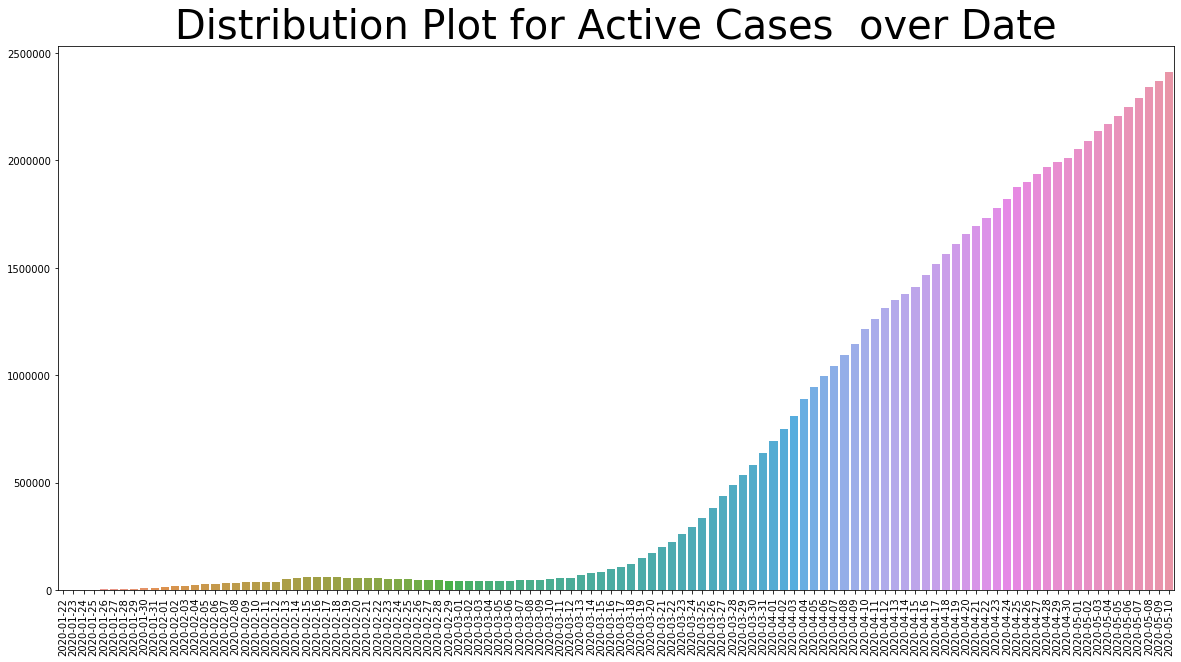

In [554]:
plt.figure(figsize=(20,10))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution Plot for Active Cases  over Date",fontsize=40)
plt.xticks(rotation=90)

<b> Active Cases = Confirmed Cases - Recovered Cases - Deaths

It can be cleary seen from the above bar graph , as the time passes the number of active cases get increased exponentially . It implies that the recovery rate and death is quiet low as compared to confiremed cases . As of now , there are approximately 2.5 Million active cases around the globe


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 <a list of 110 Text xticklabel objects>)

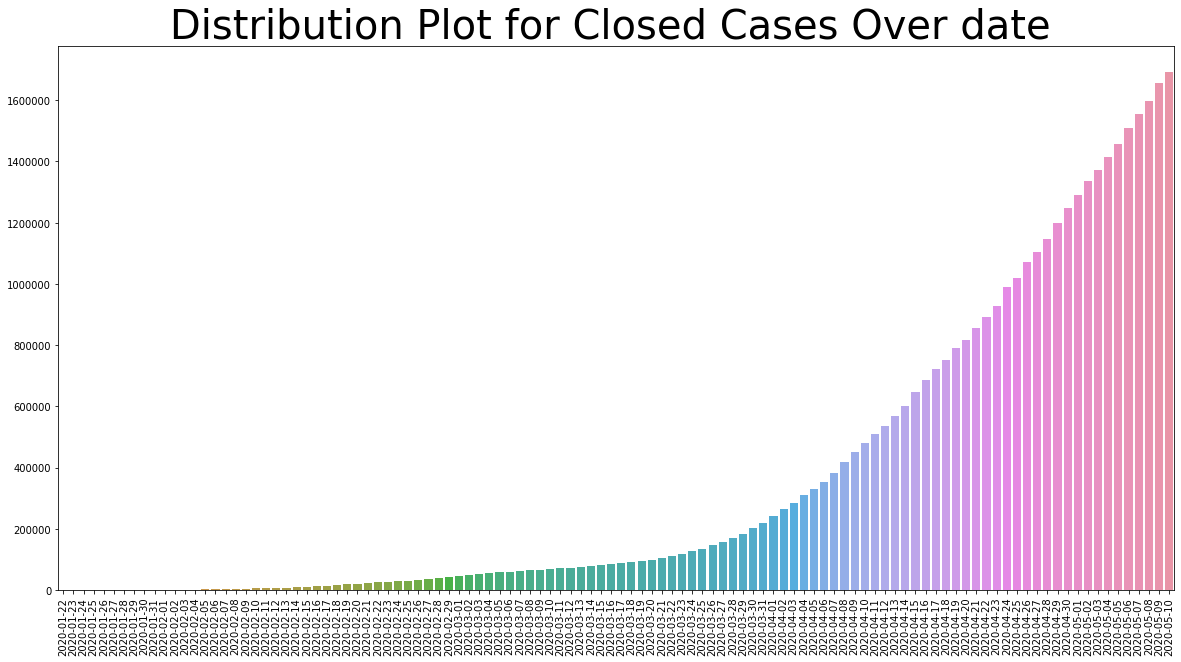

In [555]:
plt.figure(figsize=(20,10))
sns.barplot(x=datewise.index.date , y=datewise['Recovered']+datewise['Deaths'])
plt.title('Distribution Plot for Closed Cases Over date ', fontsize=40)
plt.xticks(rotation=90)

<b> Closed Cases = Recovered Cases + Deaths
Closed cases also changing exponentially but at a slower rate as compared to Actice Cases . As of now, Approx 1.6 Million Case has been closed.

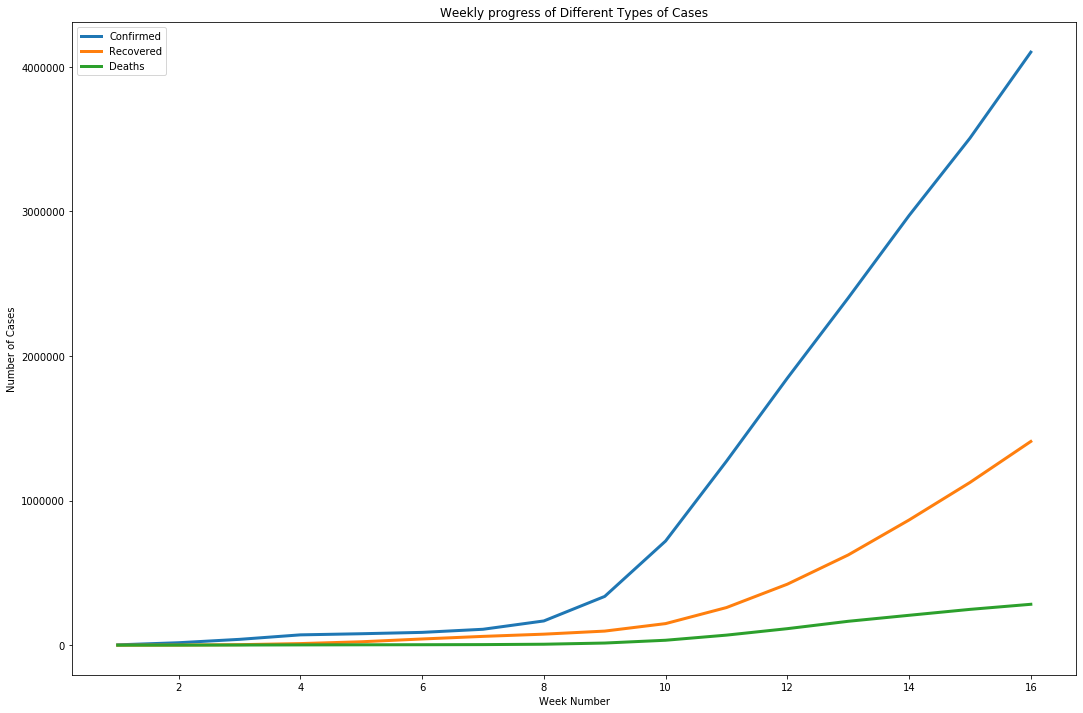

In [556]:
datewise['WeekOfYear'] = datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1

for i in list(datewise.WeekOfYear.unique()):
    weekwise_confirmed.append(datewise[datewise.WeekOfYear==i].Confirmed.max())
    weekwise_recovered.append(datewise[datewise.WeekOfYear==i].Recovered.max())
    weekwise_deaths.append(datewise[datewise.WeekOfYear==i].Deaths.max())
    week_num.append(w)
    w=w+1

plt.figure(figsize=(18,12))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.legend(['Confirmed','Recovered','Deaths'])
    


<b> Graphs of Recovered cases and Deaths is below Confirmed Cases.<br>
 1. Death curve is mostly linear. <b>
 2. Confiremed cases curve is exponenyially increasing as week passes.

Text(0.5, 1.0, 'Weekly increase in Number of Confirmed Cases')

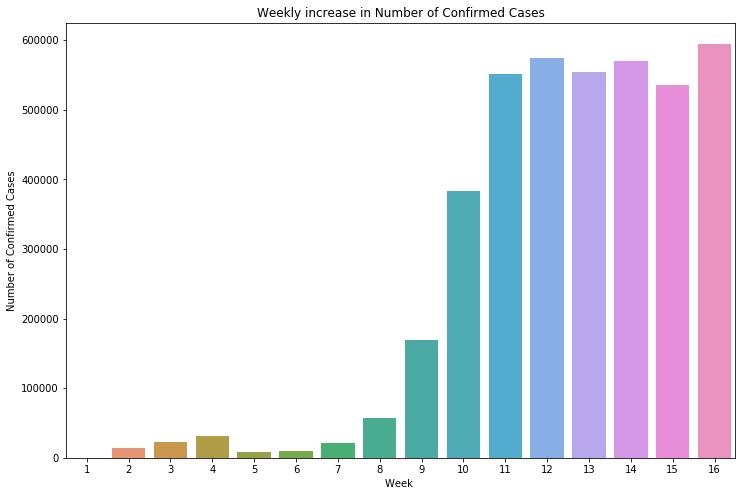

In [557]:
plt.figure(figsize=(12,8))
sns.barplot(x=week_num, y = pd.Series(weekwise_confirmed).diff().fillna(0))
plt.xlabel('Week ')
plt.ylabel('Number of Confirmed Cases')
plt.title('Weekly increase in Number of Confirmed Cases')

Text(0.5, 1.0, 'Weekly increase in Number of Death cases')

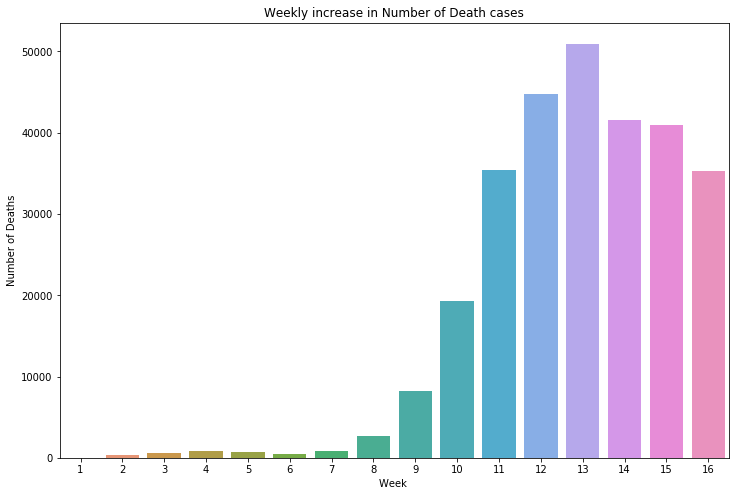

In [558]:
plt.figure(figsize=(12,8))
sns.barplot(x=week_num, y= pd.Series(weekwise_deaths).diff().fillna(0))
plt.xlabel('Week ')
plt.ylabel('Number of Deaths')
plt.title('Weekly increase in Number of Death cases')

<b>The death toll was low in 14th week, as it was expected to rise looking at the trend of infection of death trend of previous few weeks.

<b>15th Week showed another small dip in number of Death cases, as compared to 14th Week. Showing we are somehow able to reduce the Death cases to some extent.

## Growth rate of Confirmed, Recovered and Death Cases

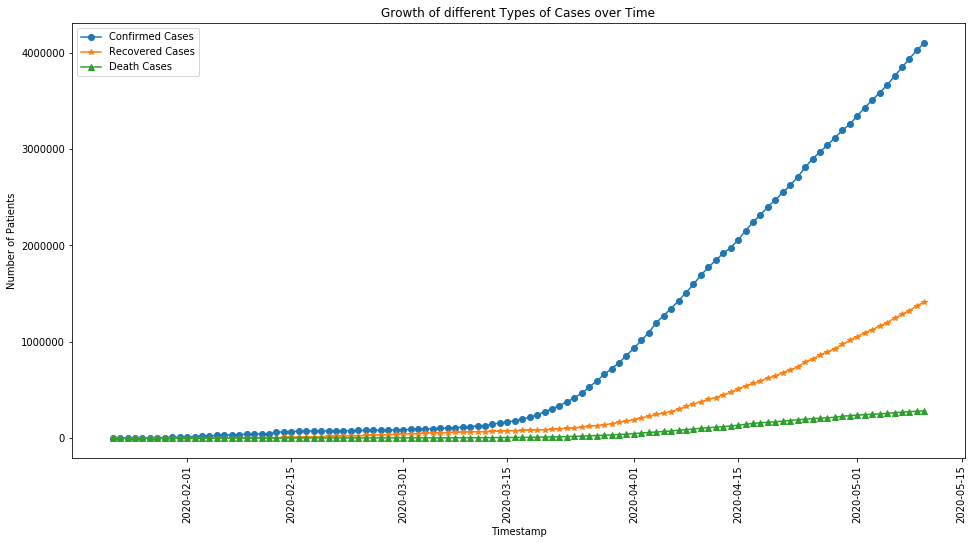

In [559]:
plt.figure(figsize=(16,8))

plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")

plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

## Moratality and Recovery Rate analysis around the World

In [560]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100

datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

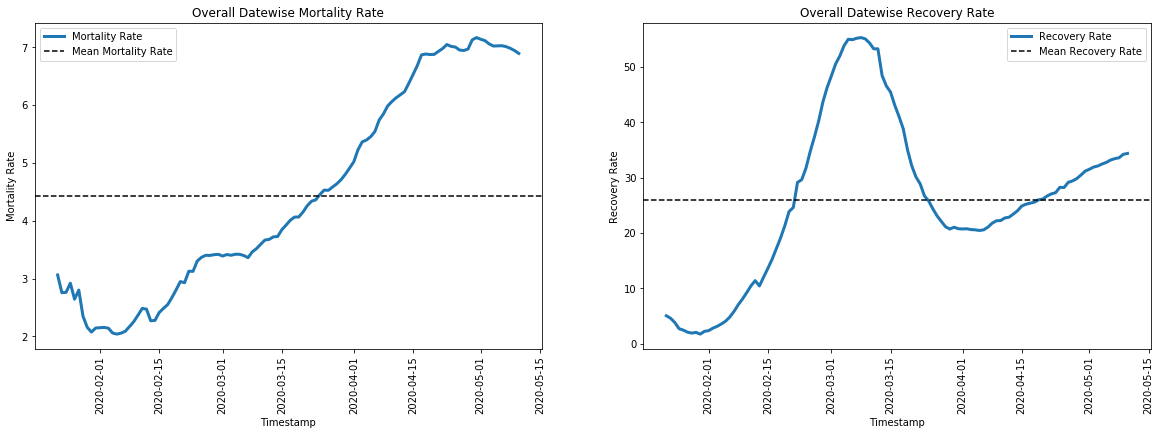

In [561]:


#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate',linewidth=3)
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Overall Datewise Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Overall Datewise Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

In [562]:
print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Mortality Rate 4.426979371982535
Median Mortality Rate 3.9672236348992724
Average Recovery Rate 26.001817559933826
Median Recovery Rate 25.462984463997607


<b>
Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100<br>
Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100<br>
Mortality rate is showing a significant dip since past few days, which is a positive sign.<b>

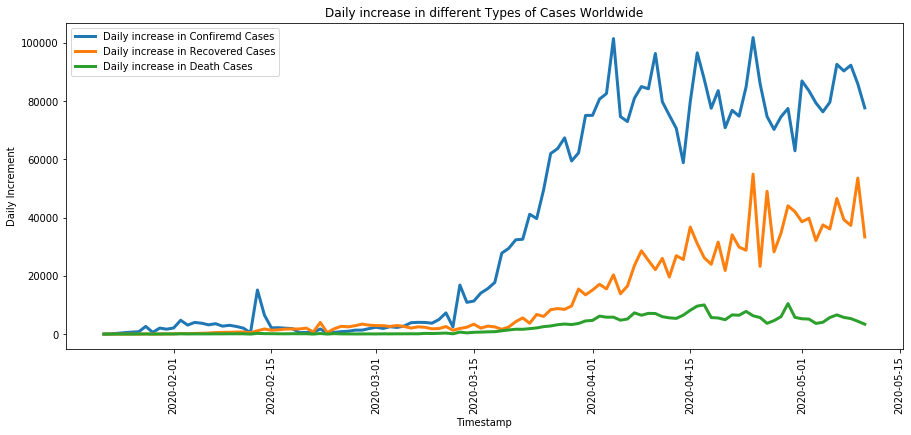

In [563]:

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

## Growth Factor


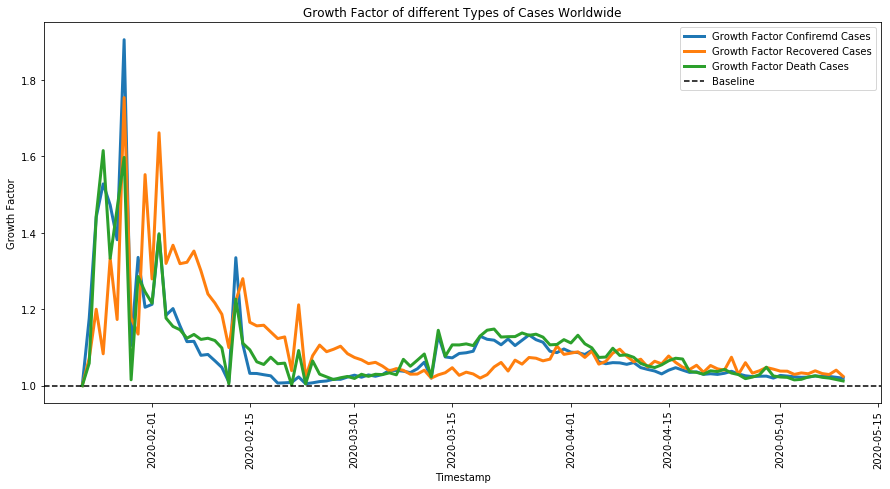

In [564]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

# Countrywise Analysis

In [565]:
#Latest Data
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

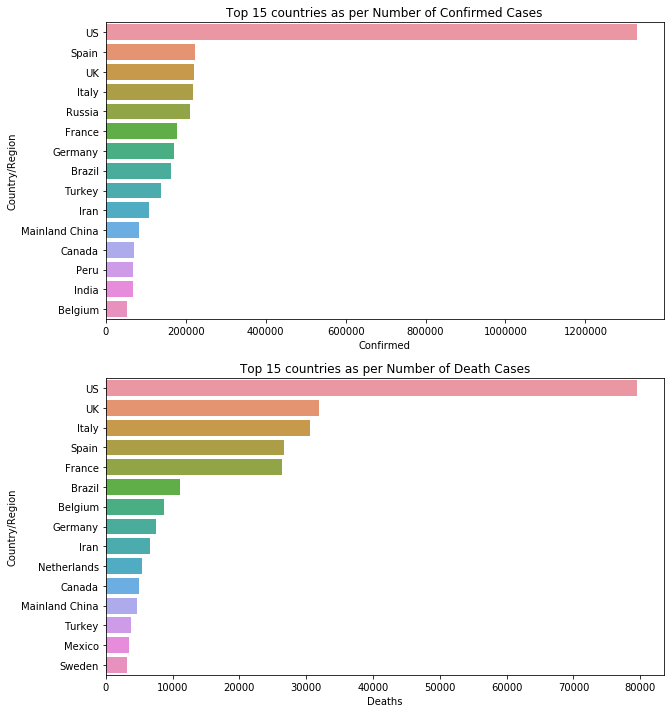

In [566]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

##  Top 25 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases

Text(0.5, 0, 'Recovery (in Percentage)')

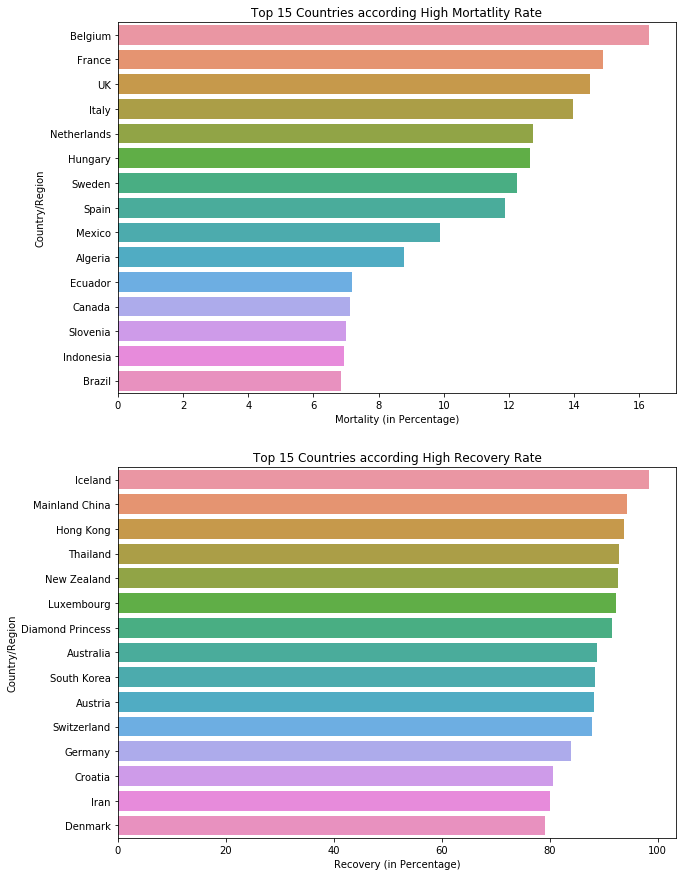

In [567]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")

countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

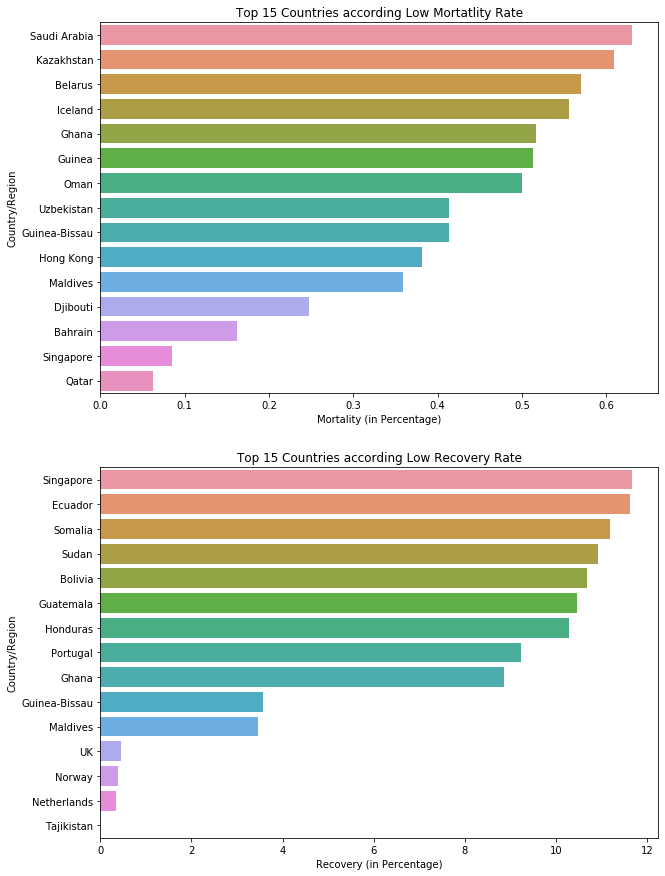

In [568]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

### No recovered patient having high mortality rate Nations

In [569]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
MS Zaandam,9,2,22.2222
Comoros,11,1,9.09091
Tajikistan,612,20,3.26797


### Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate

In [570]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Cambodia,122,120,0,98.3607
Vietnam,288,241,0,83.6806
Madagascar,193,101,0,52.3316
Rwanda,284,140,0,49.2958
Uganda,121,55,0,45.4545
Nepal,110,31,0,28.1818
Central African Republic,143,10,0,6.99301
South Sudan,120,2,0,1.66667


<b>Vietnam has able to contain COVID-19 pretty well with no Deaths recorded so far with pretty healthy Recovery Rate. Just for information Vietnam was the first country to inform World Health Organization about Human to Human Transmission of COVID-19.

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

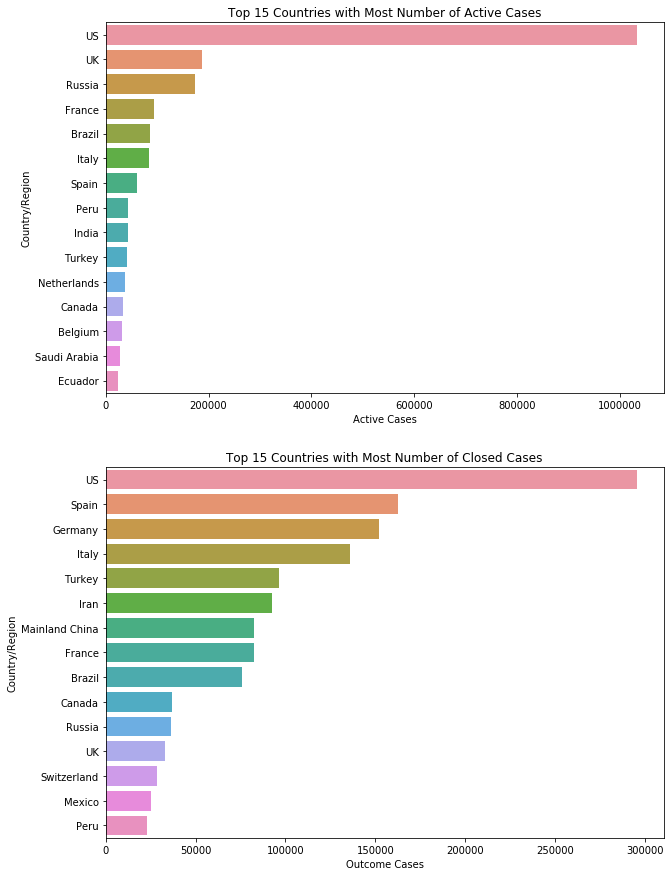

In [571]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

## Journey Of Different Coutries

In [572]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [573]:
grouped_country['Active Cases'] = grouped_country['Confirmed']-grouped_country['Recovered']-grouped_country['Deaths']
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

Text(0.5, 1.0, 'COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases')

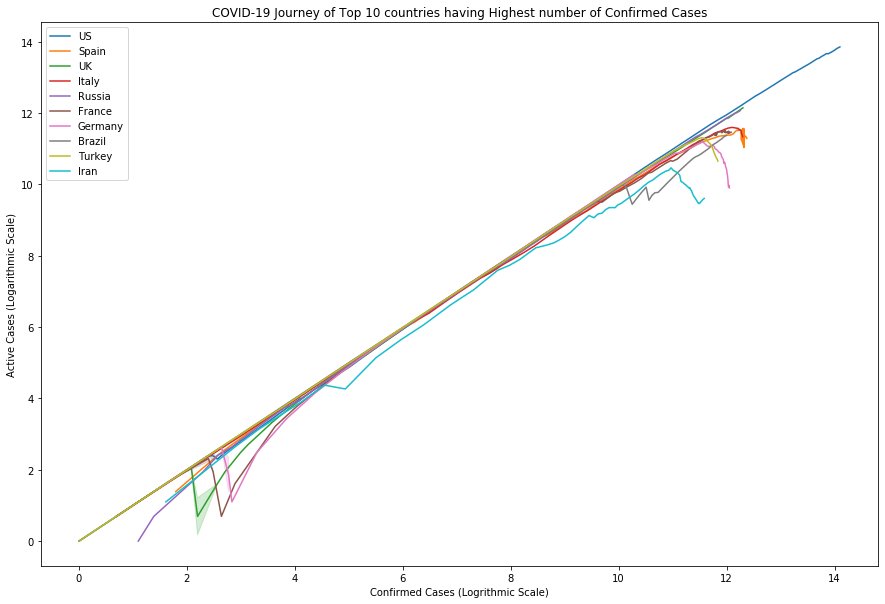

In [574]:
plt.figure(figsize=(15,10))
for country in countrywise.head(10).index:
    sns.lineplot(x=grouped_country.ix[country]["log_confirmed"],y=grouped_country.ix[country]["log_active"],label=country)
plt.xlabel("Confirmed Cases (Logrithmic Scale)")
plt.ylabel("Active Cases (Logarithmic Scale)")
plt.title("COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases")

## Clustering of Countries

In [575]:
covid.head(2)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000


In [576]:
china_data = covid[covid['Country/Region']=='Mainland China']
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")& (covid["Country/Region"]!="India") &(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Spain")]

In [577]:
datewise_china = china_data.groupby(['ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

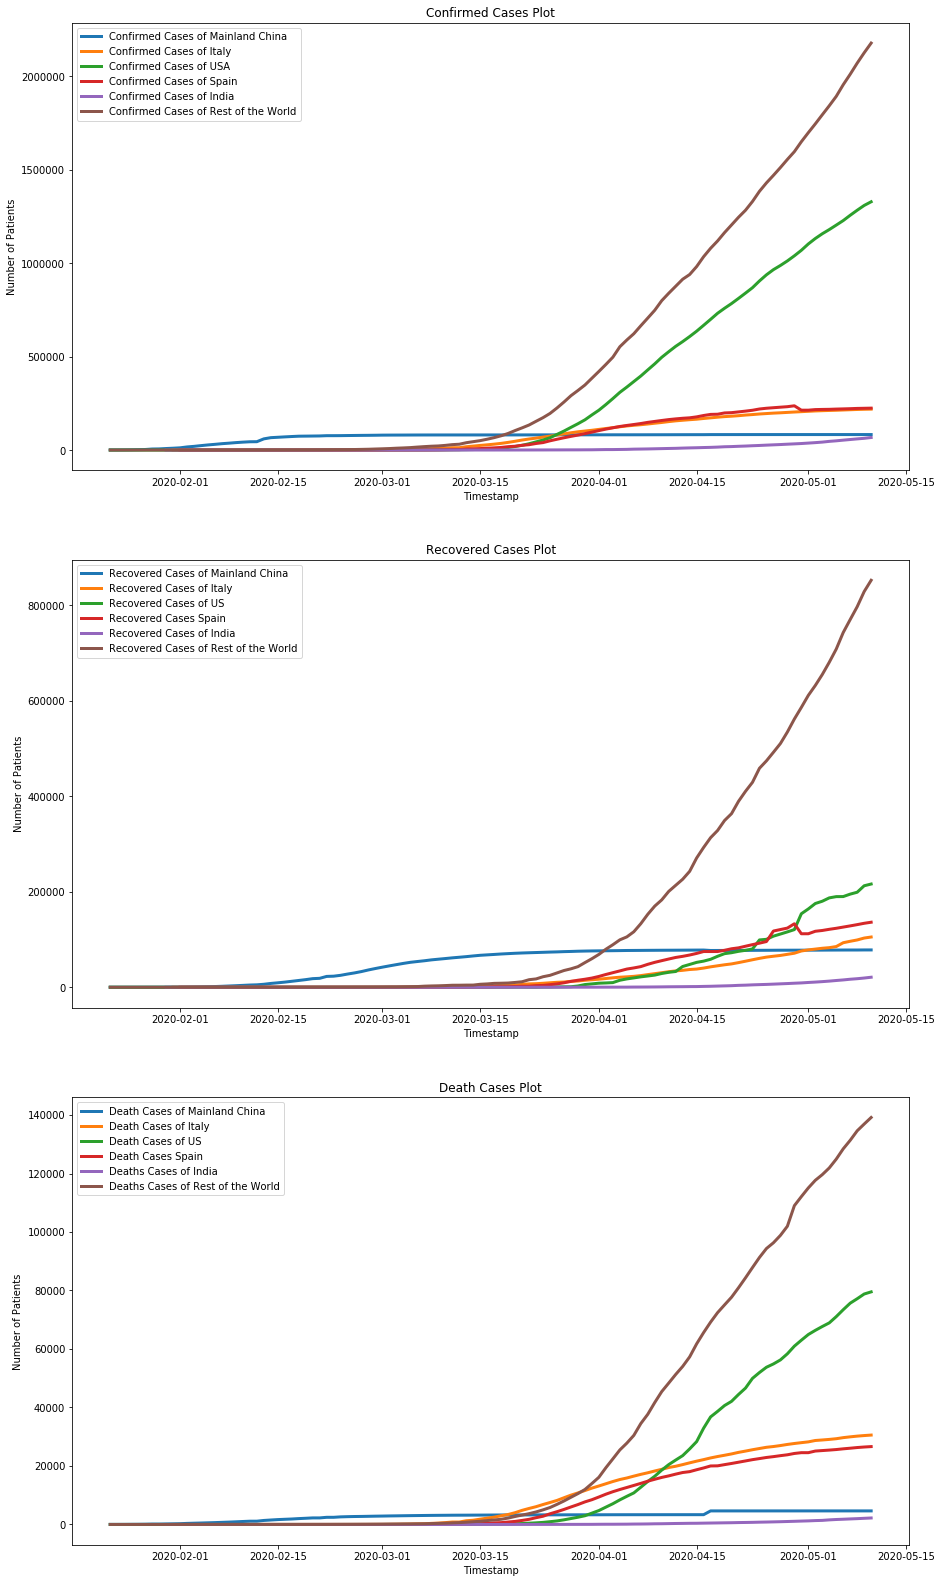

In [578]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,28))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed Cases of USA",linewidth=3)
ax1.plot(datewise_Spain["Confirmed"],label="Confirmed Cases of Spain",linewidth=3)
ax1.plot(datewise_india.Confirmed , label="Confirmed Cases of India" , linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()



ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="Recovered Cases of US",linewidth=3)
ax2.plot(datewise_Spain["Recovered"],label="Recovered Cases Spain",linewidth=3)
ax2.plot(datewise_india.Recovered , label="Recovered Cases of India" , linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()



ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Death Cases of US',linewidth=3)
ax3.plot(datewise_Spain["Deaths"],label='Death Cases Spain',linewidth=3)
ax3.plot(datewise_india.Deaths , label="Deaths Cases of India" , linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",linewidth=3)
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()

In [579]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Spain["Mortality"]=(datewise_Spain["Deaths"]/datewise_Spain["Confirmed"])*100
datewise_india['Mortality'] = (datewise_india.Deaths/datewise_india.Confirmed)*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100

In [580]:
datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Spain["Recovery"]=(datewise_Spain["Recovered"]/datewise_Spain["Confirmed"])*100
datewise_india['Recovery'] = (datewise_india.Recovered/datewise_india.Confirmed)*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100


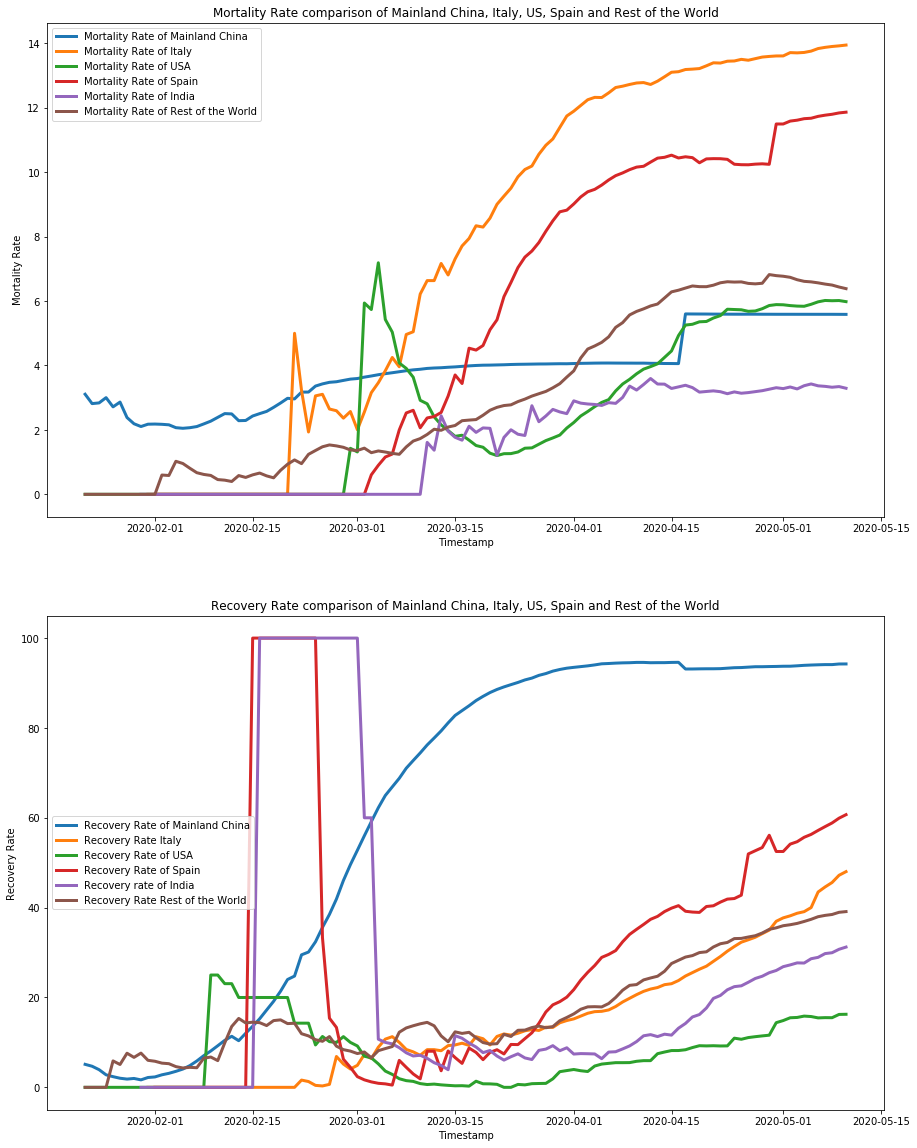

In [581]:


fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=3)
ax1.plot(datewise_US["Mortality"],label="Mortality Rate of USA",linewidth=3)
ax1.plot(datewise_Spain["Mortality"],label="Mortality Rate of Spain",linewidth=3)
ax1.plot(datewise_india.Mortality, label="Mortality Rate of India" ,linewidth=3)
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",linewidth=3)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax1.legend()



ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=3)
ax2.plot(datewise_US["Recovery"],label="Recovery Rate of USA",linewidth=3)
ax2.plot(datewise_Spain["Recovery"],label="Recovery Rate of Spain",linewidth=3)
ax2.plot(datewise_india.Recovery, label="Recovery rate of India" , linewidth=3)
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",linewidth=3)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax2.legend()

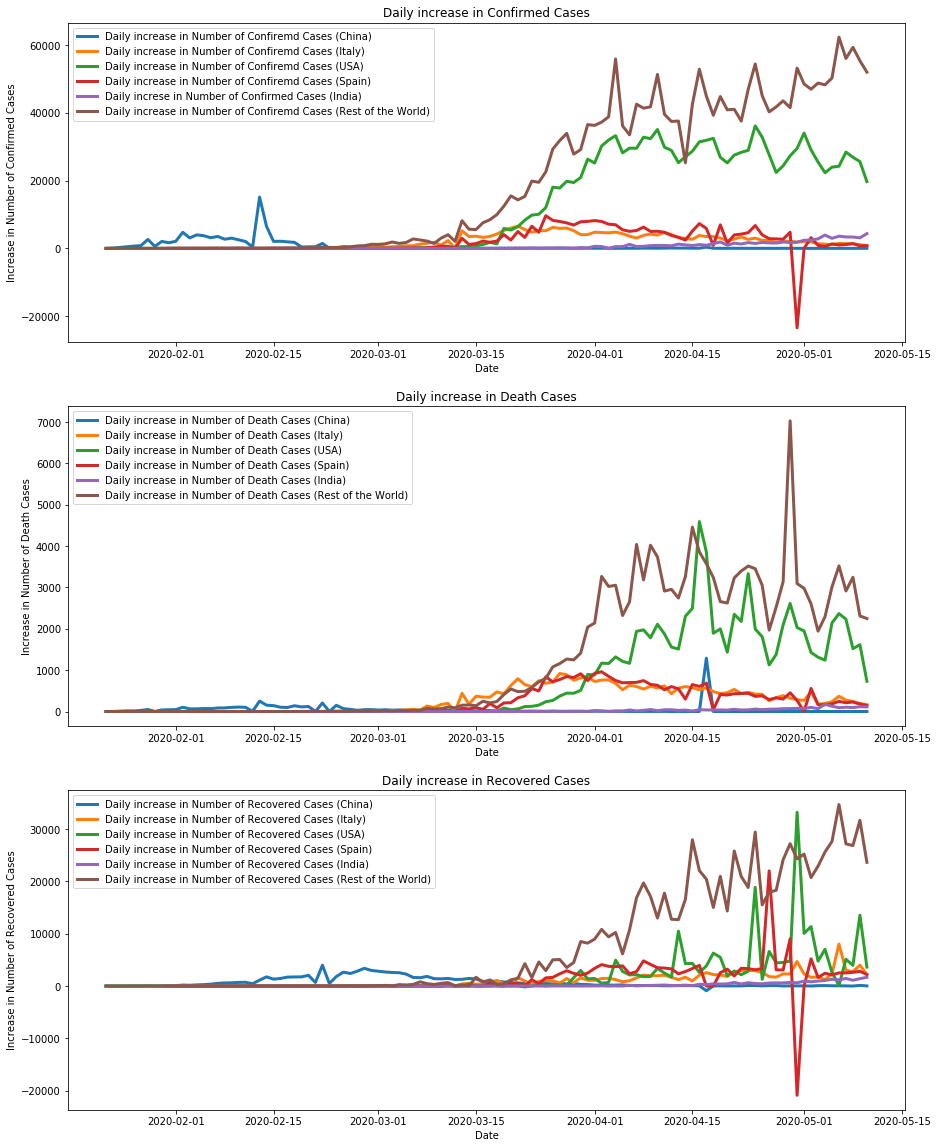

In [582]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(15,20))
ax1.plot(datewise_china["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (China)',linewidth=3)
ax1.plot(datewise_Italy["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Italy)',linewidth=3)
ax1.plot(datewise_US["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (USA)',linewidth=3)
ax1.plot(datewise_Spain["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Spain)',linewidth=3)
ax1.plot(datewise_india['Confirmed'].diff().fillna(0), label='Daily increse in Number of Confirmed Cases (India)',linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Rest of the World)',linewidth=3)
ax1.set_xlabel('Date')
ax1.set_ylabel("Increase in Number of Confirmed Cases")
ax1.set_title("Daily increase in Confirmed Cases")
ax1.legend()


ax2.plot(datewise_china["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (China)',linewidth=3)
ax2.plot(datewise_Italy["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Italy)',linewidth=3)
ax2.plot(datewise_US["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (USA)',linewidth=3)
ax2.plot(datewise_Spain["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Spain)',linewidth=3)
ax2.plot(datewise_india['Deaths'].diff().fillna(0),label='Daily increase in Number of Death Cases (India)', linewidth=3)
ax2.plot(datewise_restofworld["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Rest of the World)',linewidth=3)
ax2.set_xlabel('Date')
ax2.set_ylabel("Increase in Number of Death Cases")
ax2.set_title("Daily increase in Death Cases")
ax2.legend()

ax3.plot(datewise_china["Recovered"].diff().fillna(0),label='Daily increase in Number of Recovered Cases (China)',linewidth=3)
ax3.plot(datewise_Italy["Recovered"].diff().fillna(0),label='Daily increase in Number of Recovered Cases (Italy)',linewidth=3)
ax3.plot(datewise_US["Recovered"].diff().fillna(0),label='Daily increase in Number of Recovered Cases (USA)',linewidth=3)
ax3.plot(datewise_Spain["Recovered"].diff().fillna(0),label='Daily increase in Number of Recovered Cases (Spain)',linewidth=3)
ax3.plot(datewise_india['Recovered'].diff().fillna(0),label='Daily increase in Number of Recovered Cases (India)', linewidth=3)
ax3.plot(datewise_restofworld["Recovered"].diff().fillna(0),label='Daily increase in Number of Recovered Cases (Rest of the World)',linewidth=3)
ax3.set_xlabel('Date')
ax3.set_ylabel("Increase in Number of Recovered Cases")
ax3.set_title("Daily increase in Recovered Cases")
ax3.legend()

## Data Analysis OF India 


In [583]:
covid.head(2)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000


In [584]:
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.Confirmed.max())
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

67161.0
Total Active Cases:  43980.0
Total Closed Cases:  23181.0


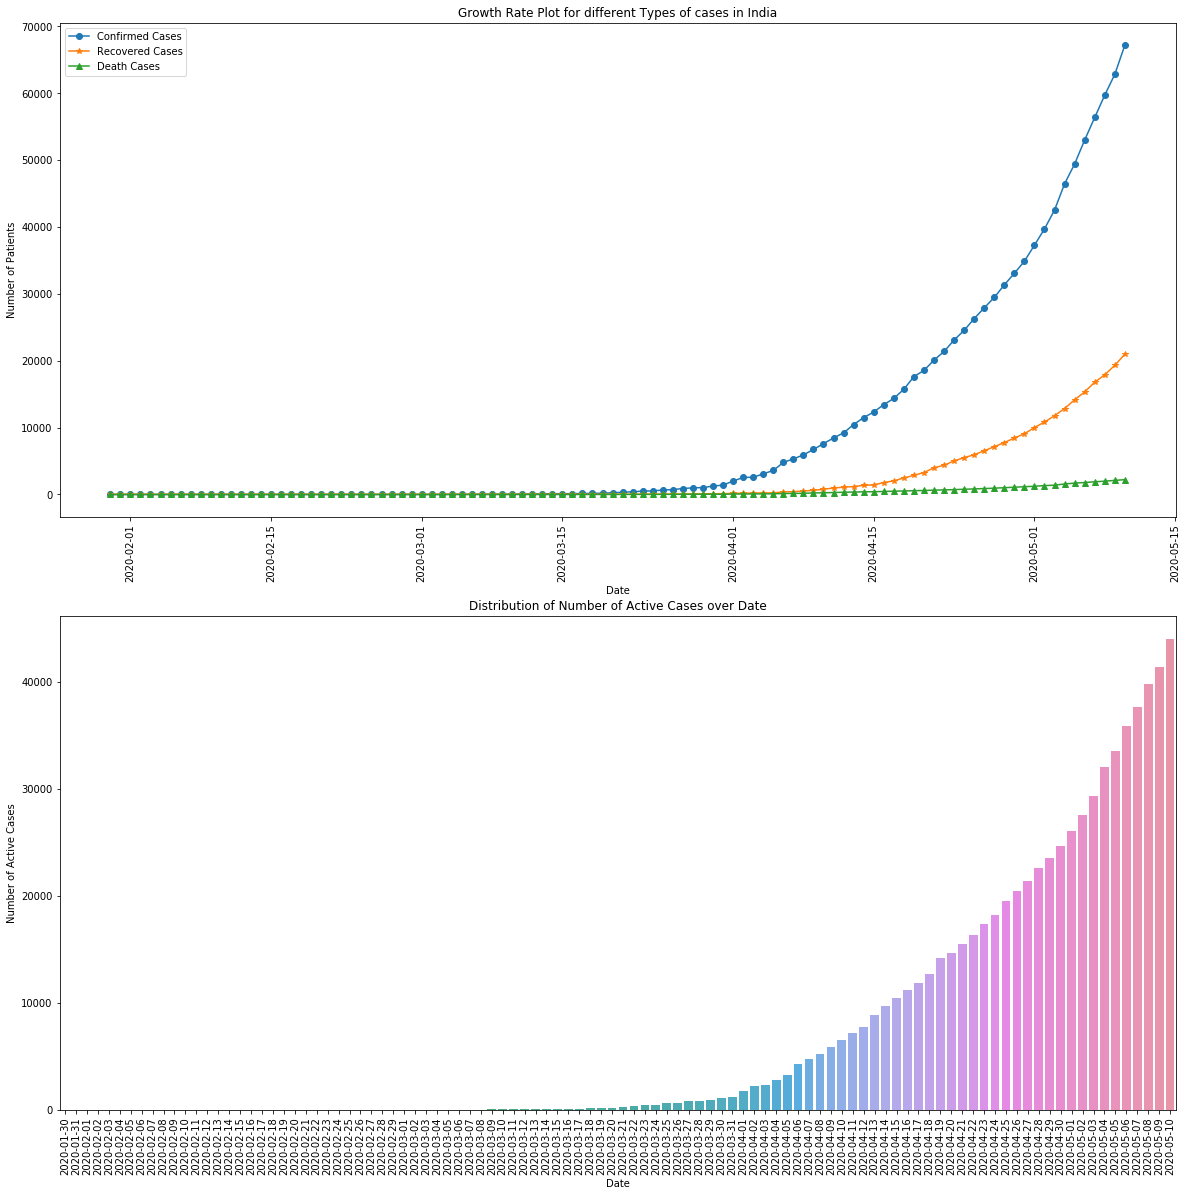

In [585]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(20,20))
ax1.plot(datewise_india["Confirmed"],marker='o',label="Confirmed Cases")
ax1.plot(datewise_india["Recovered"],marker='*',label="Recovered Cases")
ax1.plot(datewise_india["Deaths"],marker='^',label="Death Cases")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Date")
ax1.legend()
ax1.set_title("Growth Rate Plot for different Types of cases in India")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
sns.barplot(datewise_india.index.date,datewise_india["Confirmed"]-datewise_india["Recovered"]-datewise_india["Deaths"],ax=ax2)
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Active Cases")
ax2.set_title("Distribution of Number of Active Cases over Date")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

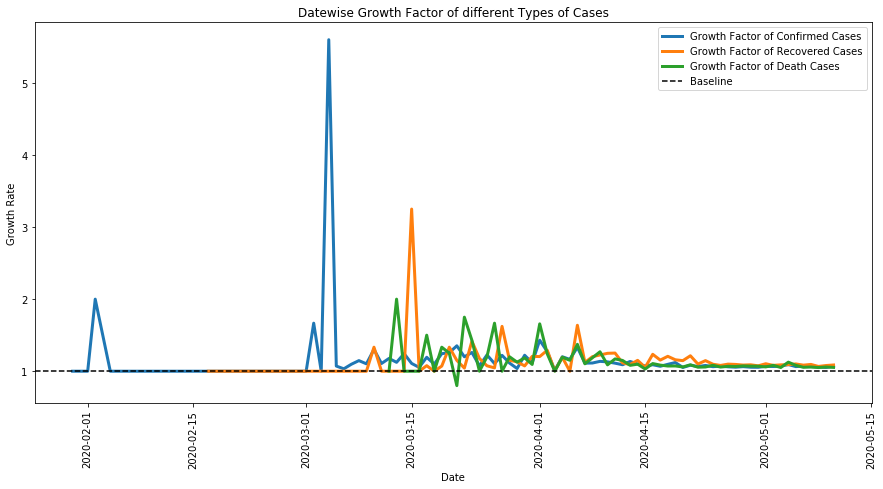

In [586]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,1)
india_increase_recover.insert(0,1)
india_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise_india.index,india_increase_confirm,label="Growth Factor of Confirmed Cases",linewidth=3)
plt.plot(datewise_india.index,india_increase_recover,label="Growth Factor of Recovered Cases",linewidth=3)
plt.plot(datewise_india.index,india_increase_deaths,label="Growth Factor of Death Cases",linewidth=3)
plt.axhline(1,linestyle='--',color="black",label="Baseline")
plt.xticks(rotation=90)
plt.title("Datewise Growth Factor of different Types of Cases")
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.legend()

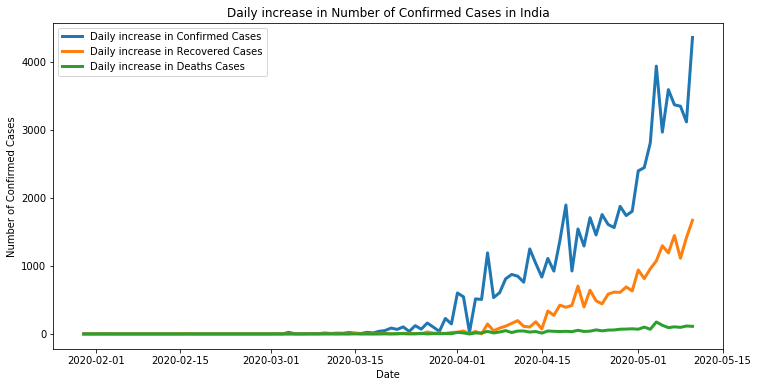

In [587]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india["Confirmed"].diff().fillna(0),linewidth=3)
plt.plot(datewise_india["Recovered"].diff().fillna(0),linewidth=3)
plt.plot(datewise_india["Deaths"].diff().fillna(0),linewidth=3)
plt.ylabel("Number of Confirmed Cases")
plt.xlabel("Date")
plt.title("Daily increase in Number of Confirmed Cases in India")
plt.legend(['Daily increase in Confirmed Cases','Daily increase in Recovered Cases','Daily increase in Deaths Cases'])

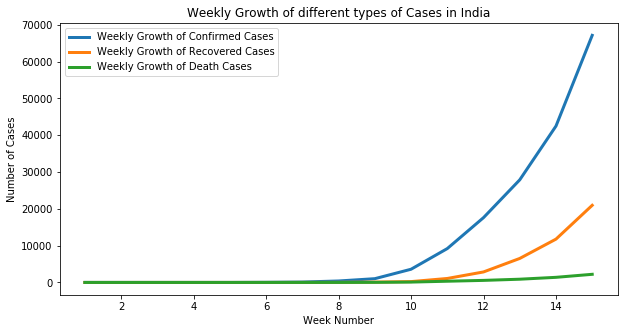

In [588]:
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear

week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekOfYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekOfYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
    
plt.figure(figsize=(10,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3,label="Weekly Growth of Confirmed Cases")
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3,label="Weekly Growth of Recovered Cases")
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3,label="Weekly Growth of Death Cases")
plt.xlabel('Week Number')
plt.ylabel("Number of Cases")
plt.title("Weekly Growth of different types of Cases in India")
plt.legend()

Text(0.5, 1.0, "India's Weekwise increase in Number of Death Cases")

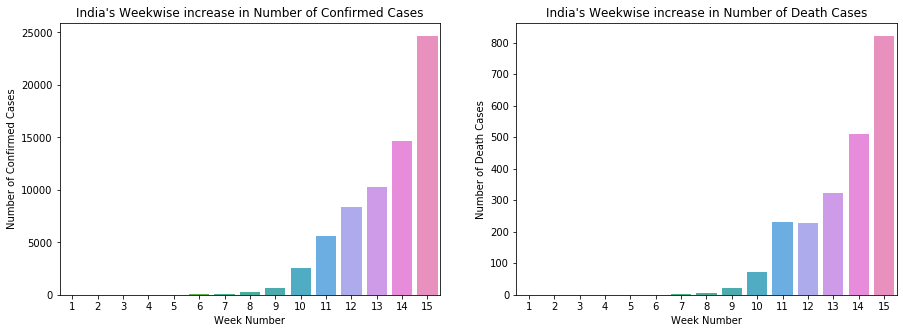

In [589]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("India's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("India's Weekwise increase in Number of Death Cases")

# Prediction On India

In [590]:
new_india_data = india_data[['ObservationDate','Confirmed']]

In [591]:
new_india_data = new_india_data.set_index('ObservationDate')

In [592]:
new_india_data['week-of-year'] = new_india_data.index.weekofyear

In [593]:
new_india_week_max = new_india_data.groupby(['week-of-year']).max()

In [594]:
X = new_india_week_max.index
Y = new_india_week_max['Confirmed']

In [595]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(X).reshape(-1,1),np.array(Y).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [596]:
future_x = pd.Series([19,20,21,22])

In [597]:
prediction_linreg = lin_reg.predict(np.array(future_x).reshape(-1,1))

In [598]:
prediction_linreg

array([[35568.90833333],
       [39035.41904762],
       [42501.9297619 ],
       [45968.44047619]])

In [599]:
type(new_india_week_max.index)

pandas.core.indexes.numeric.Int64Index

In [600]:
poly = PolynomialFeatures(degree = 4) 

train_poly=poly.fit_transform(np.array(X).reshape(-1,1))
valid_poly=poly.fit_transform(np.array([19,20,21,22,23,24]).reshape(-1,1))
linreg=LinearRegression(normalize=True)

linreg.fit(train_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [601]:
prediction_poly=linreg.predict(valid_poly)

In [602]:
prediction_poly

array([ 66462.86394909,  96292.11322011, 135023.33075258, 184249.42169105,
       245692.9235601 , 321206.00626429])

In [603]:
X

Int64Index([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64', name='week-of-year')

In [604]:
data_prediction = pd.DataFrame(data=prediction_poly,index=[19,20,21,22,23,24])

In [605]:
data_prediction.to_csv('prediction.csv')

In [606]:
data_prediction

,0
19,66462.863949
20,96292.113220
21,135023.330753
22,184249.421691
23,245692.923560
24,321206.006264


In [607]:
prection_file_india = pd.read_csv('prediction.csv')

In [608]:
prection_file_india 

,Unnamed: 0,0
0,19,66462.863949
1,20,96292.113220
2,21,135023.330753
3,22,184249.421691
4,23,245692.923560
5,24,321206.006264


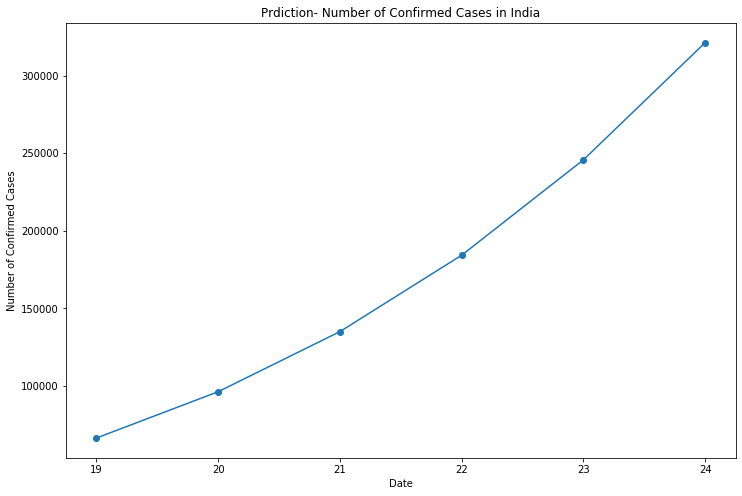

In [610]:


plt.figure(figsize=(12,8))
plt.plot(prection_file_india['Unnamed: 0'], prection_file_india['0'],marker="o")
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.title('Prdiction- Number of Confirmed Cases in India')
plt.savefig('prection.png')

In [623]:
1+4

5